In [7]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np

## 1. Customizing plots

## 2. Plotting 2D arrays

## 3. Statistical plots with Seaborn

## 4. Analyzing time series and images

### Extracting a histogram from a grayscale image

In [8]:
# Load the image into an array: image
image = plt.imread("data/640px-Unequalized_Hawkes_Bay_NZ.jpg")

# Display image in top subplot using color map 'gray'
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image, cmap="gray")

# Flatten the image into 1 dimension: pixels
pixels = image.flatten()

<IPython.core.display.Javascript object>

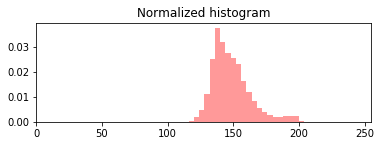

In [27]:
# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
plt.xlim((0,255))
plt.title('Normalized histogram')
#plt.hist(pixels, bins=64, range=(0,256), normed=True, color="red", alpha=0.4)
plt.hist(pixels, bins=64, range=(0,256), density=True, color="red", alpha=0.4)

# Display the plot
plt.show()

### Cumulative distribution function from an image histogram

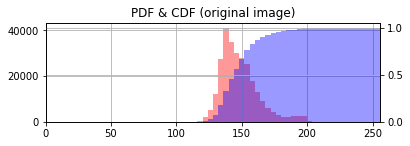

In [28]:
# Display a histogram of the pixels in the bottom subplot
plt.subplot(2,1,2)
#pdf = plt.hist(pixels, bins=64, range=(0,256), normed=False, color='red', alpha=0.4)
pdf = plt.hist(pixels, bins=64, range=(0,256), density=False, color='red', alpha=0.4)
#deprecated
#plt.grid('off')
plt.grid(True)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()

# Display a cumulative histogram of the pixels
cdf = plt.hist(pixels, bins=64, range=(0,256),
               #deprecated
               #normed=True, cumulative=True,
               density=True, cumulative=True,
               color='blue', alpha=0.4)
               
# Specify x-axis range, hide axes, add title and display plot
plt.xlim((0,256))
#deprecated
#plt.grid('off') 
plt.grid(True)
plt.title('PDF & CDF (original image)')
plt.show()

### Equalizing an image histogram

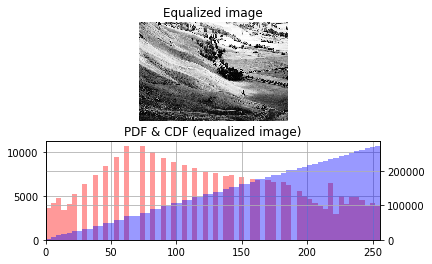

In [29]:
# Generate a cumulative histogram
#cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), normed=True, cumulative=True)
cdf, bins, patches = plt.hist(pixels, bins=256, range=(0,256), density=True, cumulative=True)
new_pixels = np.interp(pixels, bins[:-1], cdf*255)

# Reshape new_pixels as a 2-D array: new_image
new_image = new_pixels.reshape(image.shape)

# Display the new image with 'gray' color map
plt.subplot(2,1,1)
plt.title('Equalized image')
plt.axis('off')
plt.imshow(new_image, cmap="gray")

# Generate a histogram of the new pixels
plt.subplot(2,1,2)
#pdf = plt.hist(new_pixels, bins=64, range=(0,256), normed=False,
pdf = plt.hist(new_pixels, bins=64, range=(0,256), density=False,
               color='red', alpha=0.4)
#plt.grid('off')
plt.grid(True)

# Use plt.twinx() to overlay the CDF in the bottom subplot
plt.twinx()
plt.xlim((0,256))
#plt.grid('off')
plt.grid(True)

# Add title
plt.title('PDF & CDF (equalized image)')

# Generate a cumulative histogram of the new pixels
cdf = plt.hist(new_pixels, bins=64, range=(0,256),
               #cumulative=True, normed=False,
               cumulative=True, density=False,
               color='blue', alpha=0.4)
plt.show()


### Extracting histograms from a color image

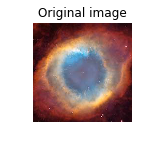

In [32]:
# Load the image into an array: image
image = plt.imread('data/hs-2004-32-b-small_web.jpg')

# Display image in top subplot
plt.subplot(2,1,1)
plt.title('Original image')
plt.axis('off')
plt.imshow(image)

# Extract 2-D arrays of the RGB channels: red, blue, green
red, green, blue = image[:,:,0], image[:,:,1], image[:,:,2]

# Flatten the 2-D arrays of the RGB channels into 1-D
red_pixels = red.flatten()
blue_pixels = blue.flatten()
green_pixels = green.flatten()

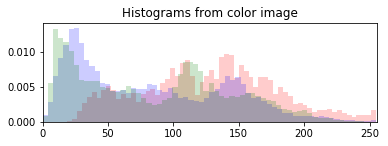

In [34]:
# Overlay histograms of the pixels of each color in the bottom subplot
plt.subplot(2,1,2)
plt.title('Histograms from color image')
plt.xlim((0,256))
#plt.hist(red_pixels, bins=64, normed=True, color='red', alpha=0.2)
plt.hist(red_pixels, bins=64, density=True, color='red', alpha=0.2)
#plt.hist(blue_pixels, bins=64, normed=True, color='blue', alpha=0.2)
plt.hist(blue_pixels, bins=64, density=True, color='blue', alpha=0.2)
#plt.hist(green_pixels, bins=64, normed=True, color='green', alpha=0.2)
plt.hist(green_pixels, bins=64, density=True, color='green', alpha=0.2)

# Display the plot
plt.show()

### Extracting bivariate histograms from a color image

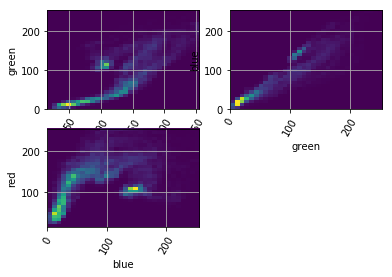

In [35]:
# Generate a 2-D histogram of the red and green pixels
plt.subplot(2,2,1)
#plt.grid('off')
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('red')
plt.ylabel('green')
plt.hist2d(red_pixels, green_pixels, bins=(32,32))

# Generate a 2-D histogram of the green and blue pixels
plt.subplot(2,2,2)
#plt.grid('off')
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('green')
plt.ylabel('blue')
plt.hist2d(green_pixels, blue_pixels, bins=(32,32))

# Generate a 2-D histogram of the blue and red pixels
plt.subplot(2,2,3)
#plt.grid('off')
plt.grid(True)
plt.xticks(rotation=60)
plt.xlabel('blue')
plt.ylabel('red')
plt.hist2d(blue_pixels, red_pixels, bins=(32,32))

# Display the plot
plt.show()
